# Student Performance Indicator

### Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Importing required library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV file

In [2]:
df = pd.read_csv('data/data.csv')

show Top 5 rows

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of the dataset(rows,column)

In [4]:
df.shape

(1000, 8)

there are 1000 rows and 8 columns

### Dataset info
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### checking missing value

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values

### Checking duplicate values

In [6]:
df.duplicated().sum()

0

There are no duplicates values

### Checking the data type info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### checking no of unique values

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### checking stats of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From above, all mean are close for math, reading and writing.
- Standard deviations are also close.
- Minimum score for math is 0, for reading is 17 and writing is 10.

### Selecting numerical values and categorical values

In [15]:
numerical_features = df.select_dtypes(include=['int64'])
categorical_features = df.select_dtypes(exclude=['int64'])

print('We have {} numerical features: {}'.format(len(numerical_features.columns.tolist()),numerical_features.columns.tolist()))
print('We have {} categorical features: {}'.format(len(categorical_features.columns.tolist()),categorical_features.columns.tolist()))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Feature Engineering

In [26]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] // 3
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average acore,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72,72
1,female,group C,some college,standard,completed,69,90,88,247,82,82
2,female,group B,master's degree,standard,none,90,95,93,278,92,92


### Exploring data (Visulization)

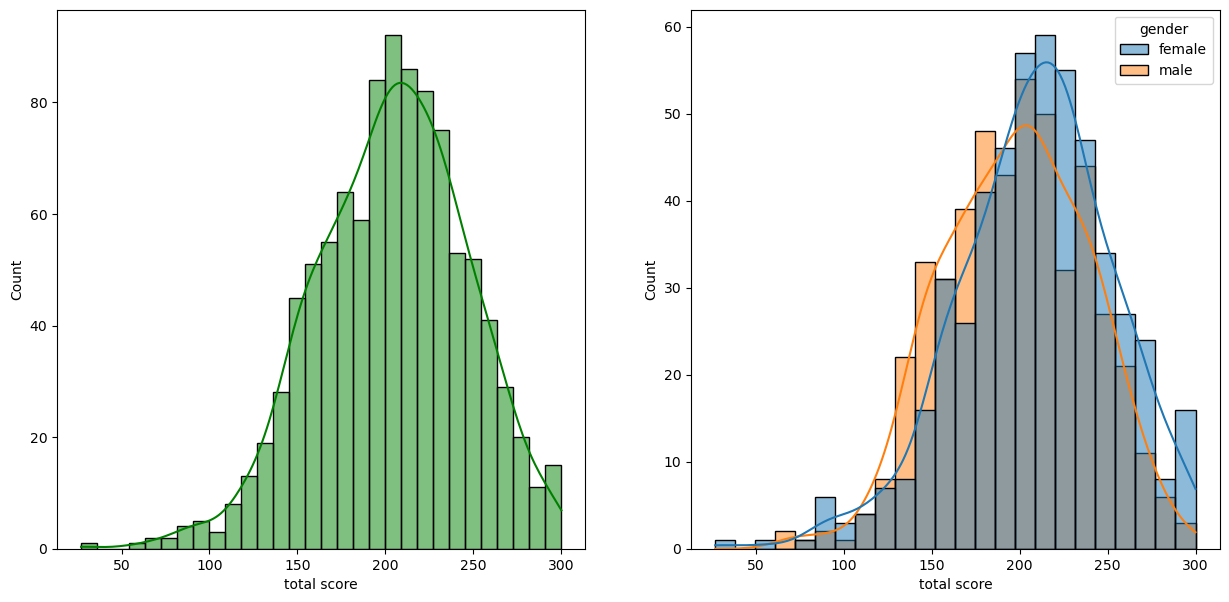

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True,hue='gender')
plt.show()

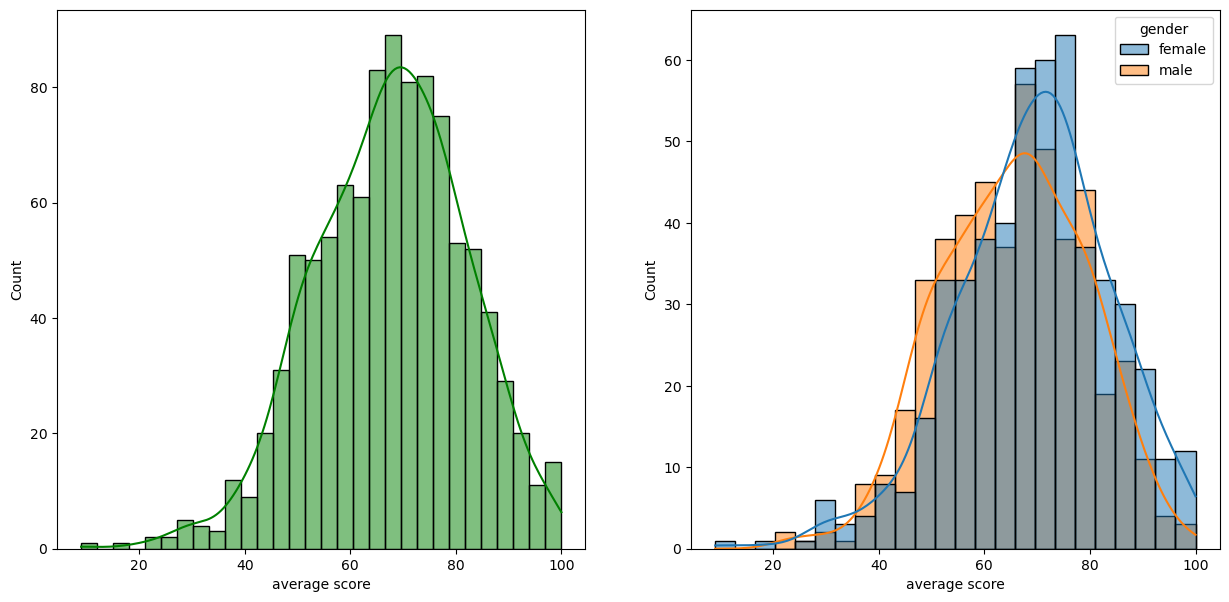

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True,hue='gender')
plt.show()

From the above graph we can know that female are doing better than male

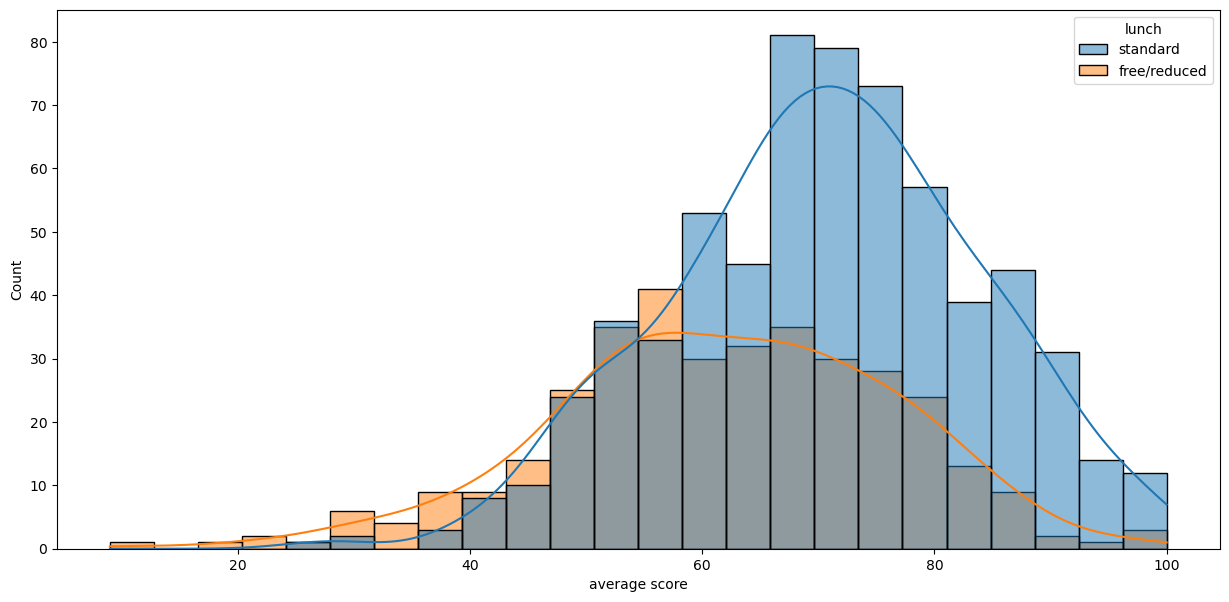

In [33]:
plt.subplots(figsize=(15,7))
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.show()

From above we can know that score of student are influenced by lunch as standard luch helped prform well in exams.

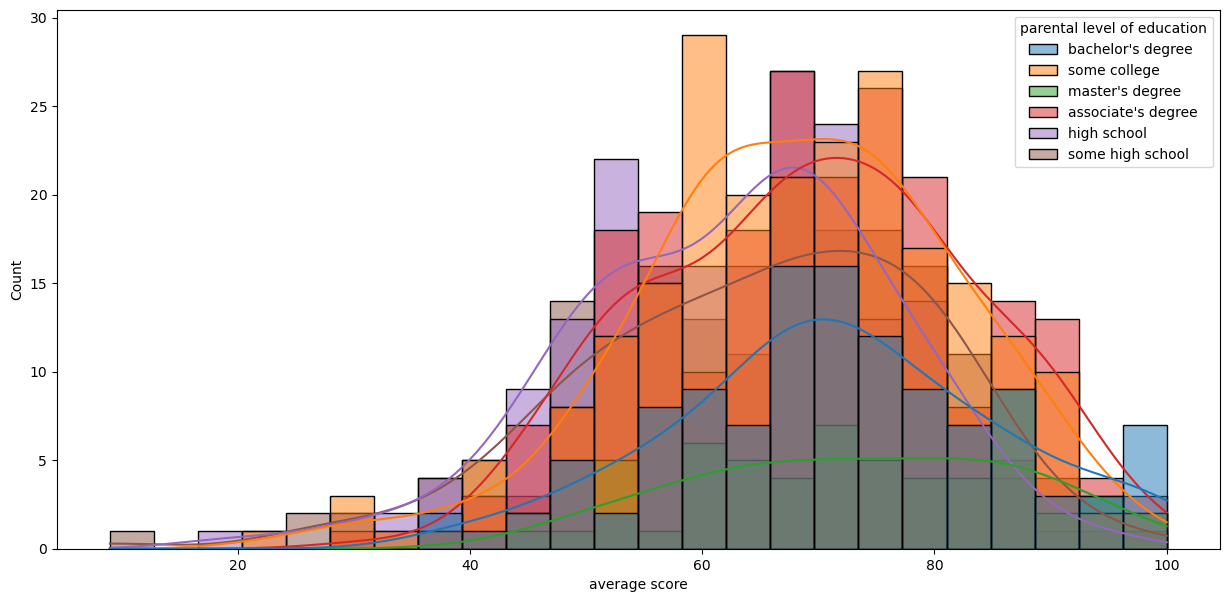

In [34]:
plt.subplots(figsize=(15,7))
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.show()

We can know that parents education didn't helped student perform well in exam.

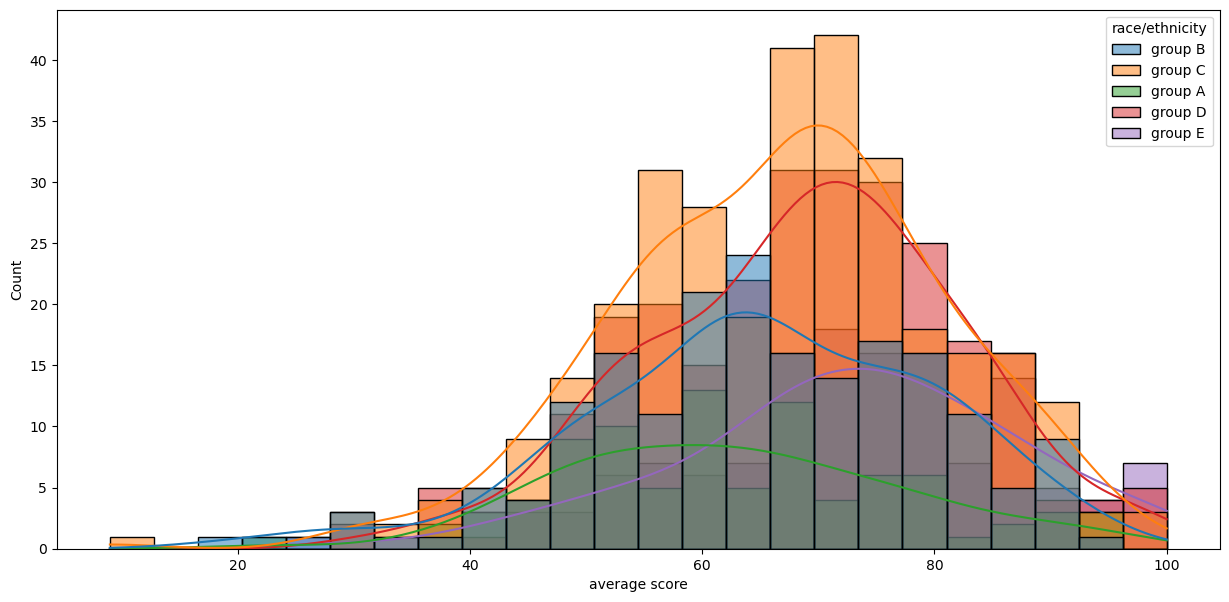

In [35]:
plt.subplots(figsize=(15,7))
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')
plt.show()

Students whose race/ethnicity are of group A and group B tends to perform poor in exam.

### Lets see if the gender has any impact on student performance

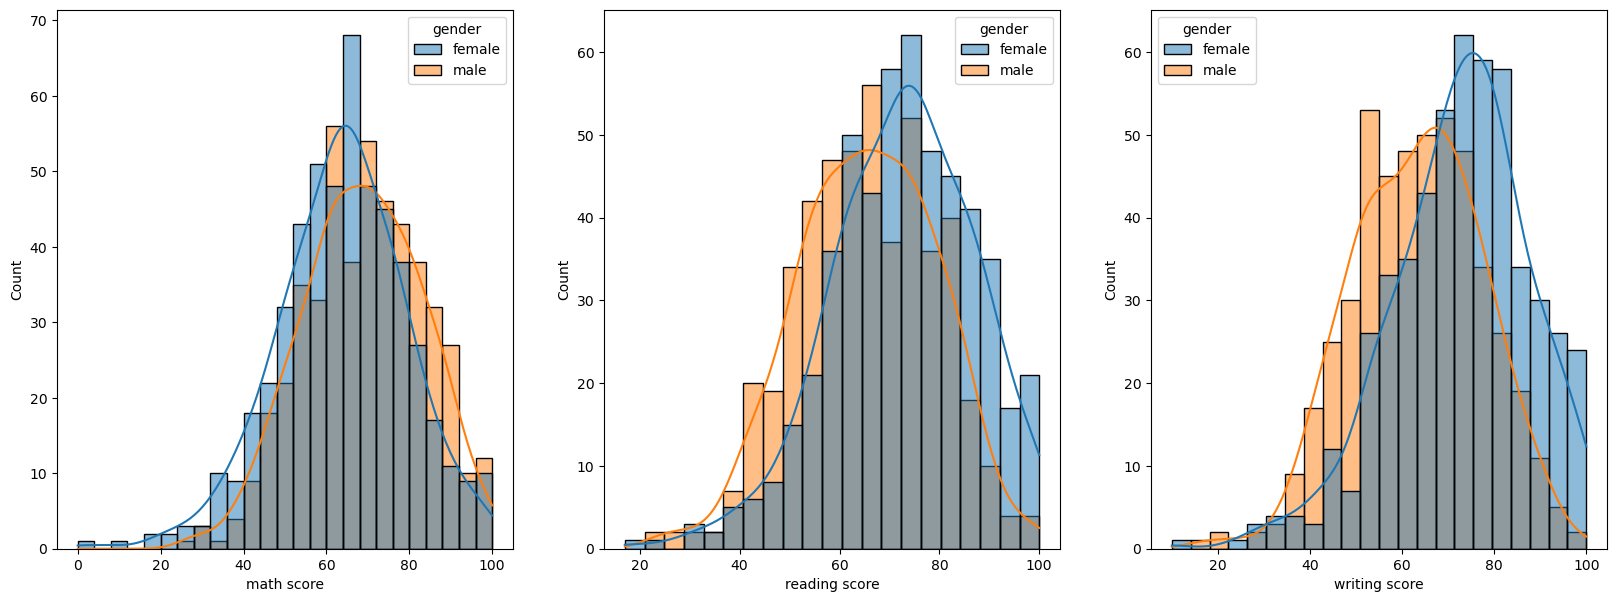

In [38]:
fig, axs= plt.subplots(1,3, figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df, x='math score', kde=True, hue='gender')
plt.subplot(132)
sns.histplot(data=df, x='reading score', kde=True, hue='gender')
plt.subplot(133)
sns.histplot(data=df, x='writing score', kde=True, hue='gender')
plt.show()

Distribution of male and female

In [41]:
gender_count = df['gender'].value_counts()
gender_count

female    518
male      482
Name: gender, dtype: int64

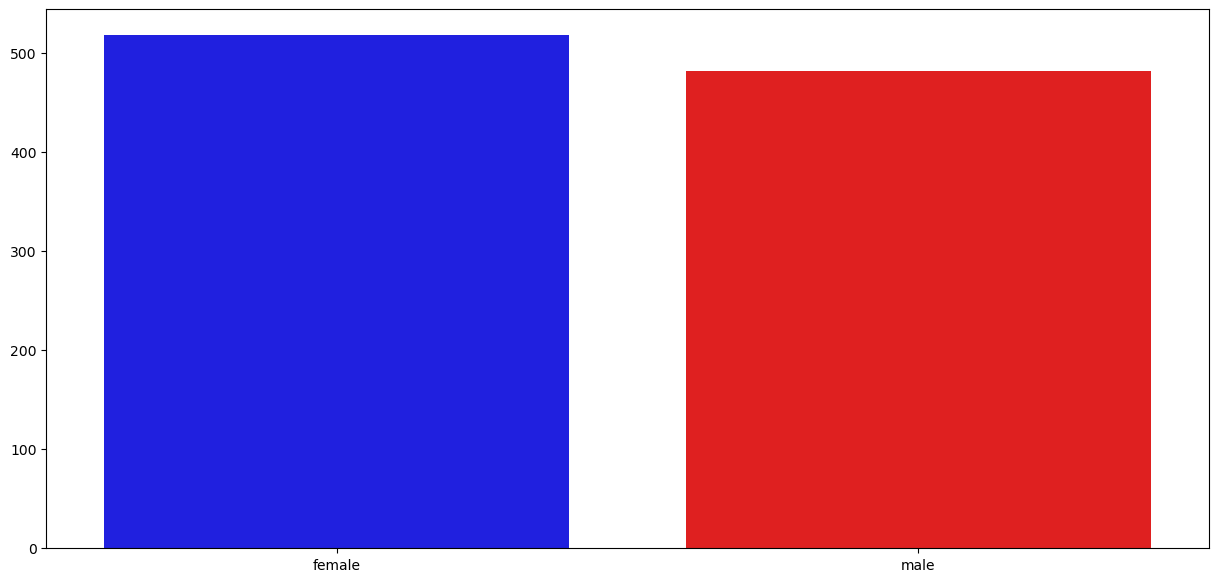

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(x=gender_count.index, y=gender_count.values, palette=['Blue','Red'])
plt.show()

So, female are more than male.

### Impact of gender on math, reading and writing score

In [49]:
avg_scores = df.groupby('gender').mean()
avg_scores

,math score,reading score,writing score,total score,average acore,average score
gender,,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.239382,69.239382
male,68.728216,65.473029,63.311203,197.512448,65.516598,65.516598


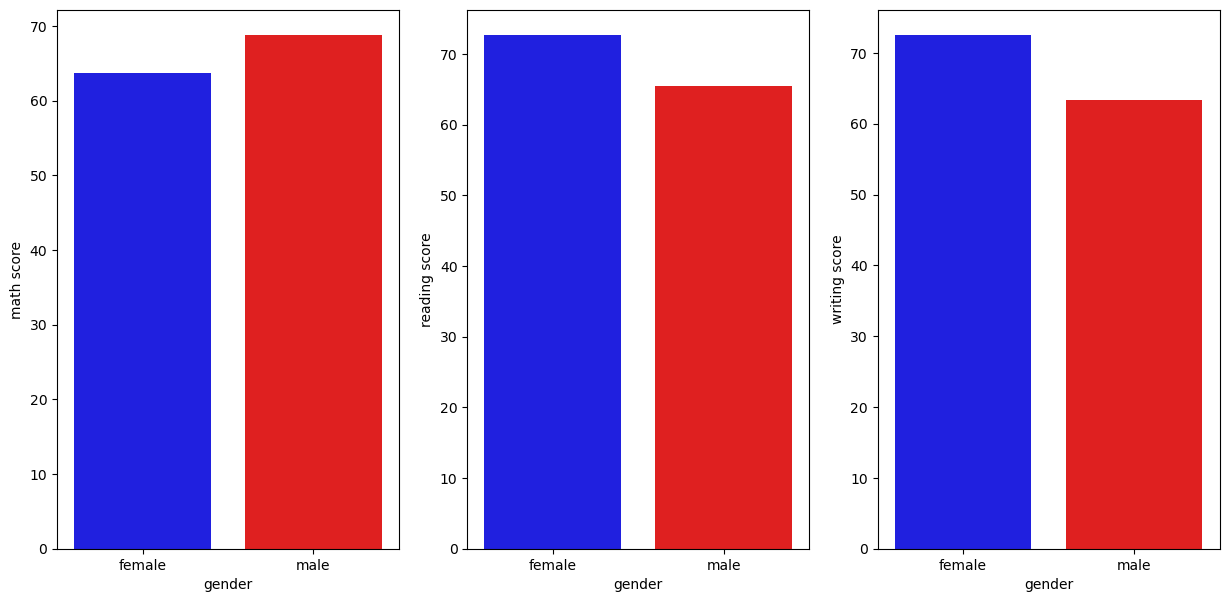

In [57]:
plt.subplots(1,3,figsize=(15,7))
colors=['Blue','Red']
plt.subplot(131)
sns.barplot(x=avg_scores.index, y=avg_scores['math score'], palette=colors)
plt.subplot(132)
sns.barplot(x=avg_scores.index, y=avg_scores['reading score'], palette=colors)
plt.subplot(133)
sns.barplot(x=avg_scores.index, y=avg_scores['writing score'], palette=colors)
plt.show()

For females, the average math score is approximately 64.058, the average reading score is around 72.797, and the average writing score is approximately 72.580.

On the other hand, for males, the average math score is about 68.728, the average reading score is around 65.663, and the average writing score is approximately 63.620.

From the data, we can observe that, on average, males tend to score higher in math compared to females. Conversely, females tend to have higher average scores in both reading and writing compared to males.

### Checking outliers

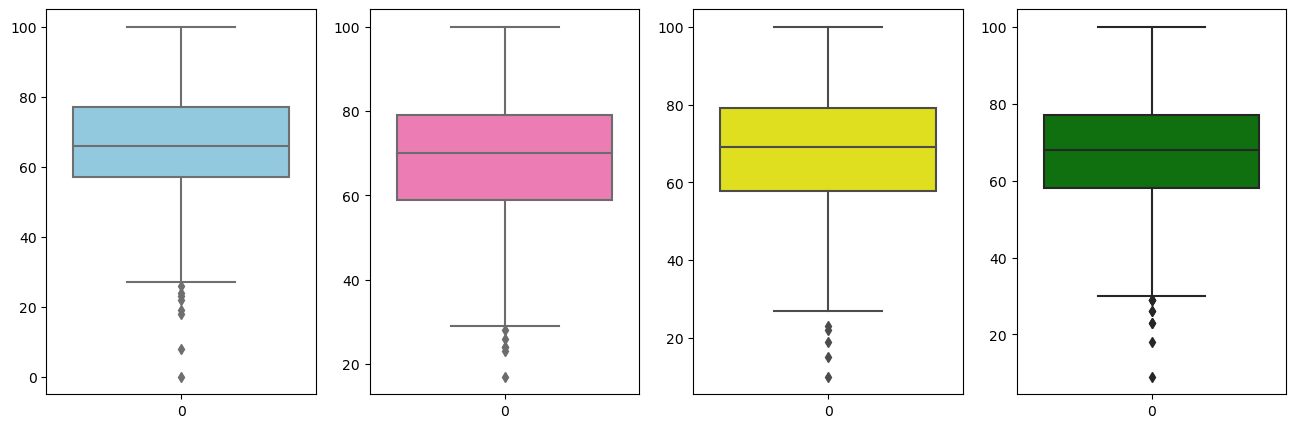

In [62]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='green')
plt.show()

### Removing outlier with IQR method

In [66]:
# Calculating the IQR, upper and lower limits
# removing outlier interms of average value
Q1 = df['average score'].quantile(0.25)
Q3 = df['average score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print('lower limit is {} and upper limit is {}'.format(lower,upper))

lower limit is 29.5 and upper limit is 105.5


In [67]:
# creating arrays of boolean values indicating the outlier rows
upper_array = np.where(df['average score'] >= upper)[0]
lower_array = np.where(df['average score'] <= lower)[0]

# shape before removing outliers 
print("old shape is ", df.shape)

# removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# shape after removing outliers 
print("new shape is ", df.shape)

old shape is  (1000, 11)
new shape is  (991, 11)


We can see that there where 9 outliers 

In [68]:
### Boxplot after outliers

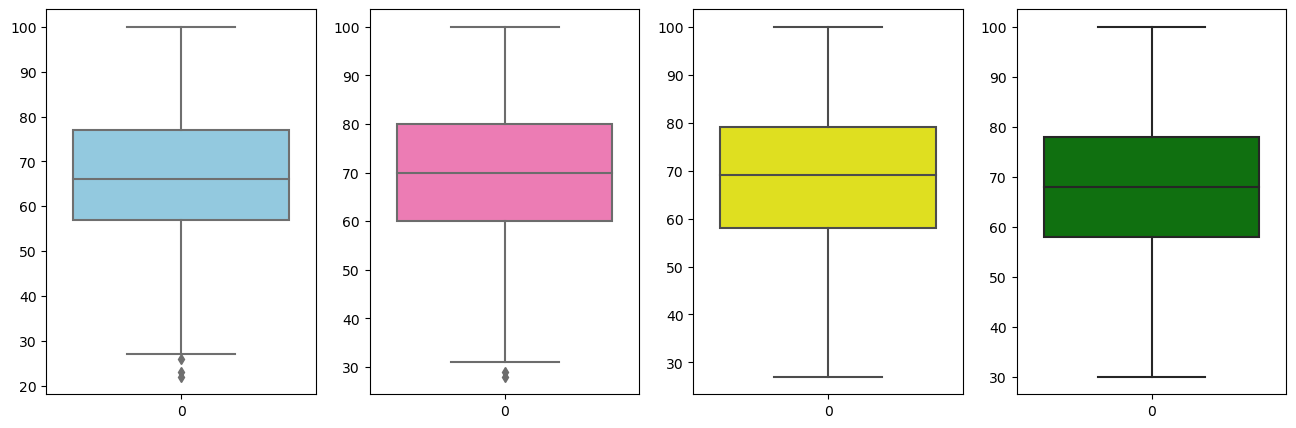

In [69]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='green')
plt.show()

### Exporting new data after removing outliers

In [71]:
df.to_csv('data/New_data.csv', index=False)

### Conclusions

- Female proformance is better than male altogether
- Student's Performance is related with lunch, race, parental level education
-  On average, males tend to score higher in math compared to females. Conversely, females tend to have higher average scores in both reading and writing compared to males